In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


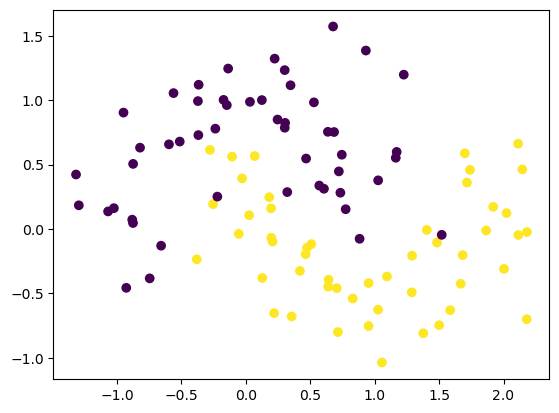

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values
X

array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.91980633,

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))#H.L1,,,kernel_initializer='he_uniform'
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))#H.L2
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))#H.L3
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))#H.L4
model.add(Dense(1,activation='sigmoid'))#p/p layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.get_weights()
#30 trainable parameters in 1st layer ie; 2 x 10=20 weights and 10 bias
#array([[-0.962801  ,  0.8053878 ,  0.21488395,  0.8697442 , -0.3148206 ,
#           1.4375135 ,  0.63891095, -0.5604835 ,  1.8198361 , -0.06490385],--->1st i/p to all 10 nodes connecting weights
#         [ 0.5498507 ,  0.26528737,  1.3510895 ,  1.8707241 , -1.9577813 ,
#          -1.1695205 ,  0.56101435, -0.01892662,  0.9093744 , -0.63256437]],---->2nd i/p to all 10 nodes connecting weight
#        dtype=float32),
#  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),------> BIAS


[array([[ 0.41609395,  0.29620296, -0.250691  , -0.7777632 ,  0.26269415,
         -1.1869823 ,  0.17479703, -0.8708702 , -1.2552633 , -0.14016813],
        [-2.0317082 , -1.1465403 ,  0.01734498,  0.67680097,  0.15855606,
         -0.6143846 ,  1.0287325 ,  1.0643632 ,  0.20897995,  1.0028822 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.592548  , -0.20692277,  0.83057886,  0.9308748 ,  0.01760527,
         -0.6487283 ,  0.4500868 ,  0.05552797,  0.4830101 ,  0.7582528 ],
        [ 0.55500287,  0.4089355 , -0.4096992 ,  0.6751883 , -0.09221632,
          0.54037625,  0.4651417 ,  0.4573585 ,  0.81871545, -0.12836784],
        [-0.3572836 , -0.272458  ,  0.5284897 ,  0.56188464, -0.18703024,
         -0.16804297, -0.16900097, -0.89029986, -0.47656402, -0.62056816],
        [ 0.7580397 , -0.47320735, -0.10911561, -0.20223175, -0.00151467,
         -0.3629143 ,  0.41349247,  0.9892166 , -0.31061712, -0.55027676],
        [-0.14457

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(2/2)#weights present from i/p to 1st H.L are initializing(2x10=20 weights are initialized)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)#bias for each node present in 1st H.L (ie; 10 nodes thus 10 biases) are initialized with zeroes
initial_weights[2] = np.random.randn(10,10)*np.sqrt(2/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(2/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(2/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(2/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

#you can use np.sqrt(1/10)  ,,by replacing activation='tanh' and kernel_initializer='Glorat_normal'or 'Glorat_uniform'

In [11]:
model.set_weights(initial_weights)#intializing weights and bias

In [12]:
model.get_weights()

[array([[-0.20738734, -0.84174603, -0.33327955, -0.18464673, -0.05580777,
          1.7809557 , -0.23123413,  0.54199743,  1.8408401 ,  0.39175367],
        [-0.37789184, -1.9890441 ,  1.507847  , -0.62834126,  0.6706425 ,
         -1.879966  ,  1.4394034 , -1.2707698 ,  1.0674087 ,  0.40176356]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.13442631, -0.522585  , -0.2169023 ,  0.57585335,  0.6425477 ,
         -0.43913558, -0.7488061 , -0.41919342,  0.11840196, -0.6371653 ],
        [ 0.6588526 ,  0.80349135,  0.42267516,  0.07620522,  0.05252812,
          0.33525014, -0.09711356,  0.13909099,  0.44980416, -0.7499183 ],
        [ 0.5388093 , -0.10634066, -0.6927148 , -0.29523048, -0.02397707,
          0.4402241 ,  0.2608733 , -0.6012893 ,  1.0861965 , -0.48128977],
        [ 0.19027136,  0.7682773 ,  0.14533462,  0.06853422, -0.07828141,
         -1.3516915 , -0.22566405,  0.8179126 ,  0.05943859, -0.25509095],
        [ 0.42963

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 83ms/step - loss: 0.7159 - accuracy: 0.5000 - val_loss: 0.6801 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6916 - accuracy: 0.5000 - val_loss: 0.6559 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6700 - accuracy: 0.5000 - val_loss: 0.6340 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6496 - accuracy: 0.5000 - val_loss: 0.6138 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6304 - accuracy: 0.5125 - val_loss: 0.5948 - val_accuracy: 0.5500
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6127 - accuracy: 0.5625 - val_loss: 0.5775 - val_accuracy: 0.5500
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6006 - accuracy: 0.6000 - val_loss: 0.5617 - val_accuracy: 0.6000
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 29ms/step - loss: 0.3393 - accuracy: 0.8625 - val_loss: 0.2272 - val_accuracy: 0.9500
Epoch 60/100
3/3 [==============================] - 0s 37ms/step - loss: 0.3385 - accuracy: 0.8625 - val_loss: 0.2263 - val_accuracy: 0.9500
Epoch 61/100
3/3 [==============================] - 0s 32ms/step - loss: 0.3377 - accuracy: 0.8625 - val_loss: 0.2253 - val_accuracy: 0.9500
Epoch 62/100
3/3 [==============================] - 0s 25ms/step - loss: 0.3369 - accuracy: 0.8625 - val_loss: 0.2246 - val_accuracy: 0.9500
Epoch 63/100
3/3 [==============================] - 0s 28ms/step - loss: 0.3361 - accuracy: 0.8625 - val_loss: 0.2239 - val_accuracy: 0.9500
Epoch 64/100
3/3 [==============================] - 0s 25ms/step - loss: 0.3353 - accuracy: 0.8625 - val_loss: 0.2230 - val_accuracy: 0.9500
Epoch 65/100
3/3 [==============================] - 0s 28ms/step - loss: 0.3345 - accuracy: 0.8625 - val_loss: 0.2217 - val_accuracy: 0.9500
Epoch 66/100
3/3 [========

In [15]:
model.get_weights()

[array([[-0.09864448, -1.0013993 , -0.363037  , -0.3043859 , -0.02266946,
          1.730937  , -0.28294253,  0.52954394,  1.9354138 ,  0.46018675],
        [-0.43401158, -2.0202508 ,  1.5807571 , -0.501089  ,  0.60811484,
         -2.0426657 ,  1.5504618 , -1.2593321 ,  0.8935511 ,  0.5085638 ]],
       dtype=float32),
 array([-0.04079106,  0.14555103,  0.05996683, -0.11599334, -0.03978019,
        -0.16581178,  0.17944627, -0.01854098, -0.03242992,  0.02598926],
       dtype=float32),
 array([[-0.21079451, -0.76573175, -0.20876333,  0.6426307 ,  0.49263173,
         -0.1915494 , -0.8020088 , -0.3152431 ,  0.240891  , -0.6371653 ],
        [ 0.66555613,  0.5747376 ,  0.39581454,  0.0907396 , -0.120703  ,
          0.53690547, -0.06848508,  0.2173182 ,  0.64023423, -0.7499183 ],
        [ 0.62313277, -0.25006393, -0.7786747 , -0.48667732, -0.0984368 ,
          0.24901344,  0.26786786, -0.67977554,  1.166579  , -0.48128977],
        [ 0.18444578,  0.6391793 ,  0.0471518 ,  0.07949182, 

9600/9600 [==============================] - 21s 2ms/step


<Axes: >

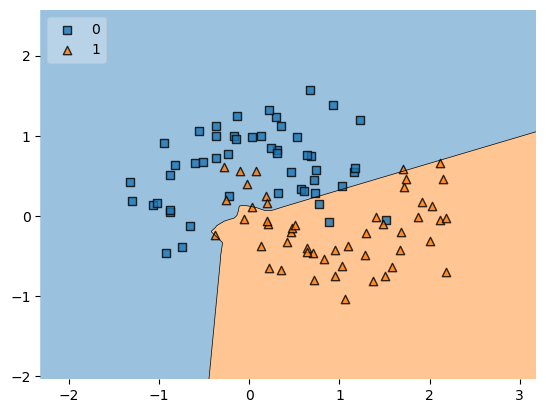

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [17]:
(np.random.randn(10,10)*0.01).min()

-0.02160901448277152

In [18]:
(np.random.randn(10,10)*0.01).max()

0.026901321911556555